2025-05-20 13:51:29.610603: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747749089.634181    1545 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747749089.641379    1545 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ Using GPU
Train samples: 13654, Test samples: 3416
Augmentation complete for class 0! Added 3114 images.
Found 16768 validated image filenames belonging to 5 classes.
Found 3416 validated image filenames belonging to 5 classes.
Computed class weights: {0: 0.9230938618221856, 1: 2.0436319317489335, 2: 1.1465299145299146, 3: 1.7084055017829853, 4: 0.5076597033000303}


I0000 00:00:1747749156.468179    1545 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1747749161.916900    1593 service.cc:148] XLA service 0x7bd32c002b80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747749161.916963    1593 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747749162.330450    1593 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/524 ━━━━━━━━━━━━━━━━━━━━ 52s 101ms/step - accuracy: 0.2500 - loss: 1.8501  

I0000 00:00:1747749172.758625    1593 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.4356 - loss: 1.3022
Epoch 1
Train - Loss: 1.1462, Acc: 0.5157
Test  - Loss: 1.0648, Acc: 0.5881, Prec: 0.6391, Rec: 0.5881, F1: 0.5892
Saving model with improved TEST F1: 0.5892
524/524 ━━━━━━━━━━━━━━━━━━━━ 255s 459ms/step - accuracy: 0.4358 - loss: 1.3019
Epoch 2/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.6096 - loss: 0.9369
Epoch 2
Train - Loss: 0.9317, Acc: 0.6138
Test  - Loss: 1.0776, Acc: 0.5896, Prec: 0.6820, Rec: 0.5896, F1: 0.5826
524/524 ━━━━━━━━━━━━━━━━━━━━ 235s 448ms/step - accuracy: 0.6096 - loss: 0.9369
Epoch 3/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.6383 - loss: 0.8774
Epoch 3
Train - Loss: 0.8702, Acc: 0.6404
Test  - Loss: 0.9787, Acc: 0.6033, Prec: 0.6588, Rec: 0.6033, F1: 0.6061
Saving model with improved TEST F1: 0.6061
524/524 ━━━━━━━━━━━━━━━━━━━━ 236s 451ms/step - accuracy: 0.6383 - loss: 0.8774
Epoch 4/10
524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.6584 - loss

W0000 00:00:1747751533.407743    1545 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1747751533.407803    1545 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1747751533.422702    1545 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


✅ TFLite model saved
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step

✅ Test Set Evaluation:
Accuracy: 0.6452 | Precision: 0.6828 | Recall: 0.6452 | F1 Score: 0.6374

🧾 Classification Report (Test):
                                        precision    recall  f1-score   support

                  Affected individuals       0.33      0.02      0.03       132
Rescue volunteering or donation effort       0.41      0.55      0.47       411
     Infrastructure and utility damage       0.59      0.88      0.70       723
            Other relevant information       0.59      0.75      0.66       501
                      Not humanitarian       0.85      0.58      0.69      1649

                              accuracy                           0.65      3416
                             macro avg       0.55      0.56      0.51      3416
                          weighted avg       0.68      0.65      0.64      3416



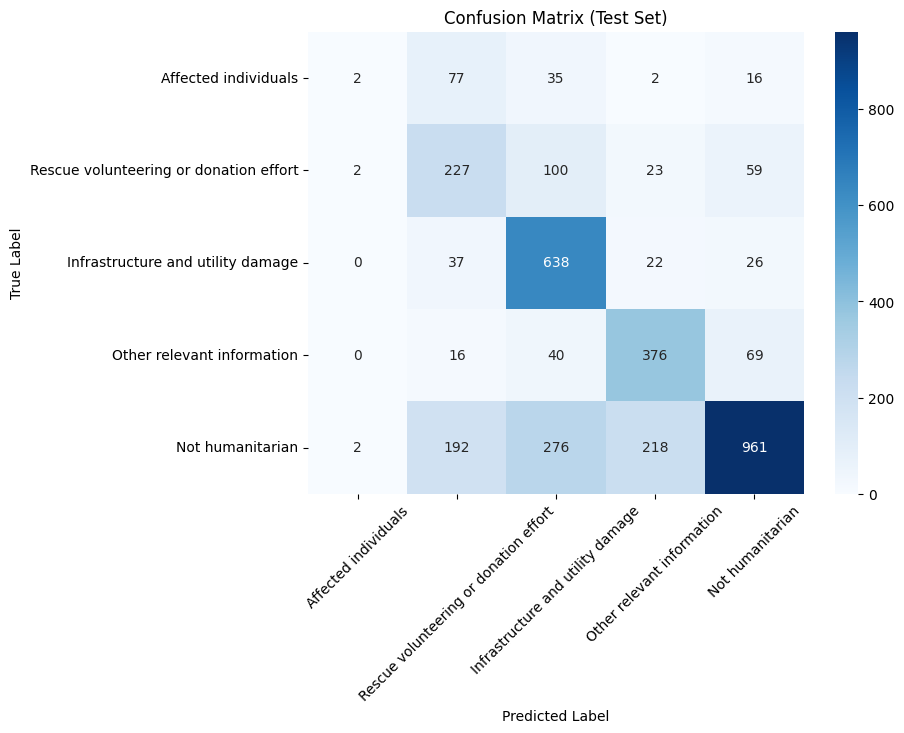

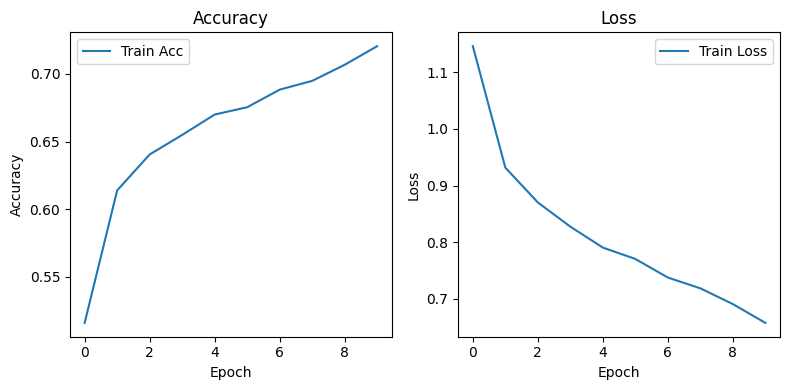

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# GPU Setup
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("✅ Using GPU")
else:
    print("⚠ Using CPU")

# Data Paths
base_path = "/kaggle/working/output"
os.makedirs(base_path, exist_ok=True)
train_dir = "/kaggle/input/split-data/content/split_data/train"
test_dir = "/kaggle/input/split-data/content/split_data/test"
csv_path = "/kaggle/input/file-csvv/filtered.csv"  # Update with actual CSV path

# Define the remapping for 5-class classification
remapping = {
    'injured_or_dead_people': 0,        # Merged into "affected_individuals"
    'missing_or_found_people': 0,       # Merged into "affected_individuals"
    'rescue_volunteering_or_donation_effort': 1,  # "rescue_volunteering_or_donation_effort"
    'vehicle_damage': 2,                # Merged into "infrastructure_and_utility_damage"
    'infrastructure_and_utility_damage': 2,  # "infrastructure_and_utility_damage"
    'other_relevant_information': 3,    # "other_relevant_information"
    'not_humanitarian': 4,              # "not_humanitarian"
    'affected_individuals': 0           # Already mapped in dataset
}

# Function to find image path in directory (handles subfolders)
def find_image_path(image_id, base_dir):
    extensions = ['.jpg', '.jpeg', '.png']
    image_id_base = os.path.splitext(image_id)[0]
    for ext in extensions:
        flat_path = os.path.join(base_dir, f"{image_id_base}{ext}")
        if os.path.exists(flat_path):
            return flat_path
        for subfolder in glob.glob(os.path.join(base_dir, '*/')):
            sub_path = os.path.join(subfolder, f"{image_id_base}{ext}")
            if os.path.exists(sub_path):
                return sub_path
            sub_path = os.path.join(subfolder, image_id)
            if os.path.exists(sub_path):
                return sub_path
    return None

# Load and Process CSV
try:
    df = pd.read_csv(csv_path)
    if len(df.columns) != 3:
        raise ValueError(f"Expected CSV to have exactly 3 columns, but found {len(df.columns)}")
    image_id_col = df.columns[0]
    label_col = df.columns[1]
    df = df.rename(columns={image_id_col: 'image_id', label_col: 'text_human'})
    if 'image_id' not in df.columns or 'text_human' not in df.columns:
        raise ValueError("Renamed columns must include 'image_id' and 'text_human'")
except Exception as e:
    print(f"Error loading CSV: {e}")
    raise

# Apply Remapping
df['class'] = df['text_human'].map(remapping)
if df['class'].isnull().any():
    print("Warning: Some labels could not be mapped. Dropping invalid rows...")
    df = df.dropna(subset=['class'])

# Split into train and test based on directory
train_filepaths = []
test_filepaths = []
train_labels = []
test_labels = []

for idx, row in df.iterrows():
    image_id = row['image_id']
    label = row['class']
    train_path = find_image_path(image_id, train_dir)
    if train_path:
        train_filepaths.append(train_path)
        train_labels.append(str(int(label)))
        continue
    test_path = find_image_path(image_id, test_dir)
    if test_path:
        test_filepaths.append(test_path)
        test_labels.append(str(int(label)))

# Create DataFrames
train_df = pd.DataFrame({'filename': train_filepaths, 'class': train_labels})
test_df = pd.DataFrame({'filename': test_filepaths, 'class': test_labels})

if train_df.empty or test_df.empty:
    raise ValueError(f"Empty DataFrame: Train ({len(train_df)}), Test ({len(test_df)}). Check image_id and directory paths.")

print(f"Train samples: {len(train_df)}, Test samples: {len(test_df)}")

# Data Augmentation for Imbalanced Classes
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    shear_range=0.2,
    fill_mode='nearest'
)

# Identify and augment minority classes
class_counts = train_df['class'].value_counts()
minority_threshold = class_counts.median() * 0.7
augmentation_factor = 3

for minority_class in class_counts[class_counts < minority_threshold].index:
    minority_class_dir = os.path.join(base_path, f"augmented_class_{minority_class}")
    os.makedirs(minority_class_dir, exist_ok=True)
    augmented_filepaths = []
    augmented_labels = []
    for img_file in train_df[train_df['class'] == minority_class]['filename']:
        img = load_img(img_file)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        save_prefix = "aug_" + os.path.splitext(os.path.basename(img_file))[0]
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=minority_class_dir, save_prefix=save_prefix, save_format='jpg'):
            i += 1
            if i >= augmentation_factor:
                break
    new_files = glob.glob(os.path.join(minority_class_dir, '*.jpg'))
    augmented_filepaths.extend(new_files)
    augmented_labels.extend([minority_class] * len(new_files))
    augmented_df = pd.DataFrame({'filename': augmented_filepaths, 'class': augmented_labels})
    train_df = pd.concat([train_df, augmented_df], ignore_index=True)
    print(f"Augmentation complete for class {minority_class}! Added {len(augmented_filepaths)} images.")

# Data Generators
IMG_SIZE = (224, 224)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    zoom_range=[0.8, 1.2],
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

try:
    train_generator = train_datagen.flow_from_dataframe(
        train_df,
        x_col='filename',
        y_col='class',
        target_size=IMG_SIZE,
        batch_size=32,
        class_mode='categorical',
        shuffle=True
    )
    test_generator = test_datagen.flow_from_dataframe(
        test_df,
        x_col='filename',
        y_col='class',
        target_size=IMG_SIZE,
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )
except Exception as e:
    print(f"Error setting up data generators: {e}")
    raise

# Compute Class Weights
try:
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_df['class']),
        y=train_df['class']
    )
    class_weights = {i: w for i, w in enumerate(class_weights)}
    print("Computed class weights:", class_weights)
except Exception as e:
    print(f"Error computing class weights: {e}")
    raise

# Build VGG16-based model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
base_model.trainable = True
for layer in base_model.layers[:-6]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Custom Callback to Save Best Model Based on Test F1 Score
class BestTestF1ModelSaver(Callback):
    def __init__(self, test_data, save_path=os.path.join(base_path, 'best_test_f1_model.keras')):
        super(BestTestF1ModelSaver, self).__init__()
        self.test_data = test_data
        self.best_test_f1 = 0.0
        self.save_path = save_path
        self.best_epoch = 0
        self.best_metrics = {}

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        train_loss = logs.get('loss', 0.0)
        train_acc = logs.get('accuracy', 0.0)

        # Evaluate on test set
        self.test_data.reset()
        y_true_test = self.test_data.classes
        y_pred_test = self.model.predict(self.test_data, verbose=0)
        y_pred_test_classes = np.argmax(y_pred_test, axis=1)

        # Compute test metrics
        test_loss, test_acc = self.model.evaluate(self.test_data, verbose=0)
        test_prec = precision_score(y_true_test, y_pred_test_classes, average='weighted')
        test_rec = recall_score(y_true_test, y_pred_test_classes, average='weighted')
        test_f1 = f1_score(y_true_test, y_pred_test_classes, average='weighted')

        # Print metrics for current epoch
        print(f"\nEpoch {epoch+1}")
        print(f"Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
        print(f"Test  - Loss: {test_loss:.4f}, Acc: {test_acc:.4f}, Prec: {test_prec:.4f}, Rec: {test_rec:.4f}, F1: {test_f1:.4f}")

        # Save model and metrics if test F1 improves
        if test_f1 > self.best_test_f1:
            print(f"Saving model with improved TEST F1: {test_f1:.4f}")
            self.best_test_f1 = test_f1
            self.best_epoch = epoch + 1
            self.best_metrics = {
                'train_loss': train_loss,
                'train_acc': train_acc,
                'test_loss': test_loss,
                'test_acc': test_acc,
                'test_prec': test_prec,
                'test_rec': test_rec,
                'test_f1': test_f1
            }
            self.model.save(self.save_path)

    def on_train_end(self, logs=None):
        print(f"\nFinal Result - Best Epoch: {self.best_epoch}")
        print("Best Test Metrics:")
        print(f"Accuracy: {self.best_metrics['test_acc']:.4f}")
        print(f"Precision: {self.best_metrics['test_prec']:.4f}")
        print(f"Recall: {self.best_metrics['test_rec']:.4f}")
        print(f"F1 Score: {self.best_metrics['test_f1']:.4f}")
        print(f"(Train - Loss: {self.best_metrics['train_loss']:.4f}, Acc: {self.best_metrics['train_acc']:.4f})")
        print(f"(Test Loss: {self.best_metrics['test_loss']:.4f})")

# Callbacks
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[early_stop, BestTestF1ModelSaver(test_generator)],
    verbose=1
)

# Save Final Model
final_model_path = os.path.join(base_path, "final_trained_model.keras")
model.save(final_model_path)
print(f"✅ Final model saved to: {final_model_path}")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
with open(os.path.join(base_path, "model_flutter.tflite"), "wb") as f:
    f.write(tflite_model)
print("✅ TFLite model saved")

# Evaluation on Test Set
model = load_model(os.path.join(base_path, "best_test_f1_model.keras"))
y_true_test = test_generator.classes
y_pred_test = model.predict(test_generator, verbose=1)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

cm = confusion_matrix(y_true_test, y_pred_test_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    "Affected individuals",
    "Rescue volunteering or donation effort",
    "Infrastructure and utility damage",
    "Other relevant information",
    "Not humanitarian"
], yticklabels=[
    "Affected individuals",
    "Rescue volunteering or donation effort",
    "Infrastructure and utility damage",
    "Other relevant information",
    "Not humanitarian"
])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig(os.path.join(base_path, 'confusion_matrix.png'))

test_acc = accuracy_score(y_true_test, y_pred_test_classes)
test_prec = precision_score(y_true_test, y_pred_test_classes, average='weighted')
test_rec = recall_score(y_true_test, y_pred_test_classes, average='weighted')
test_f1 = f1_score(y_true_test, y_pred_test_classes, average='weighted')

print("\n✅ Test Set Evaluation:")
print(f"Accuracy: {test_acc:.4f} | Precision: {test_prec:.4f} | Recall: {test_rec:.4f} | F1 Score: {test_f1:.4f}")
print("\n🧾 Classification Report (Test):")
print(classification_report(y_true_test, y_pred_test_classes, target_names=[
    "Affected individuals",
    "Rescue volunteering or donation effort",
    "Infrastructure and utility damage",
    "Other relevant information",
    "Not humanitarian"
]))

# Visualize Metrics
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(base_path, 'training_metrics.png'))